In [21]:
import pandas as pd
import numpy as np
from sklearn import preprocessing  
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split

In [22]:
df = pd.read_csv('cblol_dados2018a2023.csv', index_col=0)
df = df.sort_values("date")
df = df.reset_index(drop=True)

In [23]:
df

,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,NaN,0,2018-09-14 21:59:26,1.0,8.16,1,...,125.0,1007.0,654.0,13.0,1.0,0.0,0.0,1.0,0.0,1.0
1,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,NaN,0,2018-09-14 21:59:26,1.0,8.16,2,...,79.0,-185.0,-323.0,-19.0,0.0,5.0,0.0,1.0,4.0,2.0
2,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,NaN,0,2018-09-14 21:59:26,1.0,8.16,3,...,123.0,1410.0,301.0,3.0,4.0,0.0,1.0,0.0,1.0,0.0
3,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,NaN,0,2018-09-14 21:59:26,1.0,8.16,4,...,113.0,-647.0,-496.0,12.0,0.0,3.0,2.0,2.0,3.0,1.0
4,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,NaN,0,2018-09-14 21:59:26,1.0,8.16,5,...,25.0,-295.0,438.0,-23.0,0.0,2.0,2.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,complete,NaN,CBLOL,2022,Split 2,1,2022-09-03 18:34:04,3.0,12.14,5,...,26.0,39.0,-716.0,-4.0,1.0,2.0,1.0,1.0,2.0,1.0
8696,complete,NaN,CBLOL,2022,Split 2,1,2022-09-03 18:34:04,3.0,12.14,6,...,114.0,287.0,747.0,12.0,0.0,1.0,0.0,1.0,0.0,1.0
8697,complete,NaN,CBLOL,2022,Split 2,1,2022-09-03 18:34:04,3.0,12.14,7,...,87.0,587.0,155.0,6.0,3.0,0.0,1.0,0.0,2.0,1.0
8698,complete,NaN,CBLOL,2022,Split 2,1,2022-09-03 18:34:04,3.0,12.14,8,...,144.0,31.0,687.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df.isnull().sum()

datacompleteness       0
url                 2430
league                 0
year                   0
split                380
                    ... 
assistsat15            0
deathsat15             0
opp_killsat15          0
opp_assistsat15        0
opp_deathsat15         0
Length: 122, dtype: int64

In [25]:
#change won description into numeric
label_encoder = preprocessing.LabelEncoder()
df['result']= label_encoder.fit_transform(df['result'])

In [26]:
df.drop(['datacompleteness','url','league','year','split','playoffs','date','game','patch','participantid','side','position','playername','playerid',
        'teamid', 'champion','teamname','ban1','ban2','ban3','ban4','ban5', 'teamdeaths','teamkills','team kpm', 'earned gpm','earnedgoldshare','doublekills','triplekills','quadrakills', 'pentakills','earnedgold', 'goldspent'],
        axis =1,
        inplace = True)

In [27]:
df

,gamelength,result,kills,deaths,assists,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,ckpm,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2313,0,6,1,3,0.0,0.0,0.0,0.0,0.7523,...,125.0,1007.0,654.0,13.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2313,0,0,2,8,1.0,0.0,1.0,0.0,0.7523,...,79.0,-185.0,-323.0,-19.0,0.0,5.0,0.0,1.0,4.0,2.0
2,2313,0,4,4,2,1.0,1.0,0.0,0.0,0.7523,...,123.0,1410.0,301.0,3.0,4.0,0.0,1.0,0.0,1.0,0.0
3,2313,0,3,4,6,0.0,0.0,0.0,0.0,0.7523,...,113.0,-647.0,-496.0,12.0,0.0,3.0,2.0,2.0,3.0,1.0
4,2313,0,1,4,5,0.0,0.0,0.0,0.0,0.7523,...,25.0,-295.0,438.0,-23.0,0.0,2.0,2.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,1844,0,1,4,4,0.0,0.0,0.0,1.0,0.9111,...,26.0,39.0,-716.0,-4.0,1.0,2.0,1.0,1.0,2.0,1.0
8696,1844,1,3,3,8,0.0,0.0,0.0,0.0,0.9111,...,114.0,287.0,747.0,12.0,0.0,1.0,0.0,1.0,0.0,1.0
8697,1844,1,5,2,12,1.0,1.0,0.0,0.0,0.9111,...,87.0,587.0,155.0,6.0,3.0,0.0,1.0,0.0,2.0,1.0
8698,1844,1,2,0,13,0.0,0.0,0.0,0.0,0.9111,...,144.0,31.0,687.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
var_colums = [c for c in df.columns if c not in ['result']]
X = df.loc[:, var_colums]
y = df.loc[:, 'result']
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'result', 
                                                    train_size=0.8, valid_size=0.1, test_size=0.1,
                                                    random_state=123)
X_train.shape, X_valid.shape,X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((6960, 88), (870, 88), (870, 88), (6960,), (870,), (870,))

In [29]:
modelo_xgboost = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=5,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)


eval_set = [(X_valid, y_valid)]


modelo_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.83506
[1]	validation_0-auc:0.88299
[2]	validation_0-auc:0.87256
[3]	validation_0-auc:0.90553
[4]	validation_0-auc:0.90230
[5]	validation_0-auc:0.91414
[6]	validation_0-auc:0.91798
[7]	validation_0-auc:0.92643
[8]	validation_0-auc:0.92885
[9]	validation_0-auc:0.92888
[10]	validation_0-auc:0.93006
[11]	validation_0-auc:0.93005
[12]	validation_0-auc:0.92794
[13]	validation_0-auc:0.92880
[14]	validation_0-auc:0.93095
[15]	validation_0-auc:0.93646
[16]	validation_0-auc:0.93376
[17]	validation_0-auc:0.93680
[18]	validation_0-auc:0.94028
[19]	validation_0-auc:0.93881
[20]	validation_0-auc:0.94030
[21]	validation_0-auc:0.93944
[22]	validation_0-auc:0.94159
[23]	validation_0-auc:0.94378
[24]	validation_0-auc:0.94483
[25]	validation_0-auc:0.94381
[26]	validation_0-auc:0.94576
[27]	validation_0-auc:0.94514
[28]	validation_0-auc:0.94396
[29]	validation_0-auc:0.94443
[30]	validation_0-auc:0.94550
[31]	validation_0-auc:0.94547
[32]	validation_0-auc:0.94582
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
y_train_pred = modelo_xgboost.predict_proba(X_train)[:,1]

y_valid_pred = modelo_xgboost.predict_proba(X_valid)[:,1]

print("AUC Treino: {:.4f}\nAUC Validado: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Treino: 0.9683
AUC Validado: 0.9540


In [31]:
learning_rate_list = [0.02, 0.07, 0.1]
max_depth_list = [2, 3, 7]
n_estimators_list = [1000, 2000, 5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.07, 0.1],
 'max_depth': [2, 3, 7],
 'n_estimators': [1000, 2000, 5000]}

In [32]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.982, test=0.960) total time=   1.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.976, test=0.970) total time=   1.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.991, test=0.965) total time=   2.4s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.988, test=0.974) total time=   2.6s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.999, test=0.967) total time=   5.9s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=5000;, score=(train=0.998, test=0.975) total time=   5.8s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.992, test=0.964) total time=   1.4s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.989, test=0.973) total time=   1.7s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [33]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
2,1,0.970626,0.998399,0.02,2,5000
4,2,0.969765,0.998265,0.02,3,2000
9,3,0.969749,0.995557,0.07,2,1000
1,4,0.969478,0.989305,0.02,2,2000
5,5,0.969446,1.000000,0.02,3,5000
18,6,0.969097,0.998178,0.1,2,1000
10,7,0.968771,0.999580,0.07,2,2000
12,8,0.968484,0.999938,0.07,3,1000
3,9,0.968455,0.990829,0.02,3,1000
8,10,0.968195,1.000000,0.02,7,5000


Text(0, 0.5, 'Media da AUC')

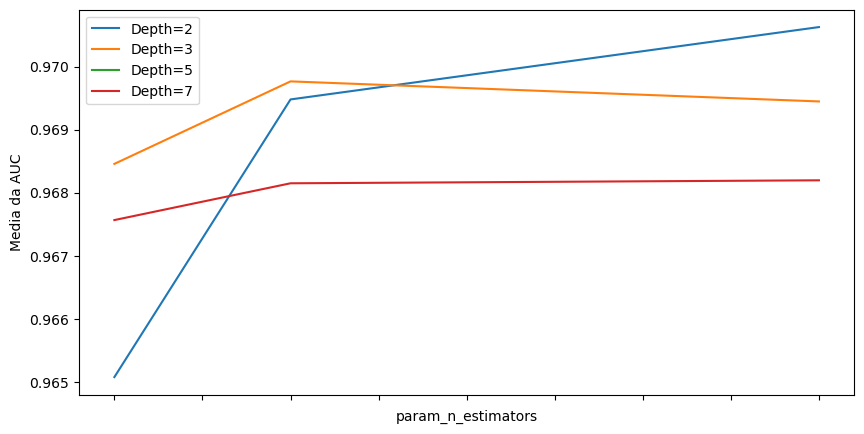

In [34]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.02) & (df_cv_results['param_max_depth']==7),:]

fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Media da AUC')

Text(0, 0.5, 'Media da AUC')

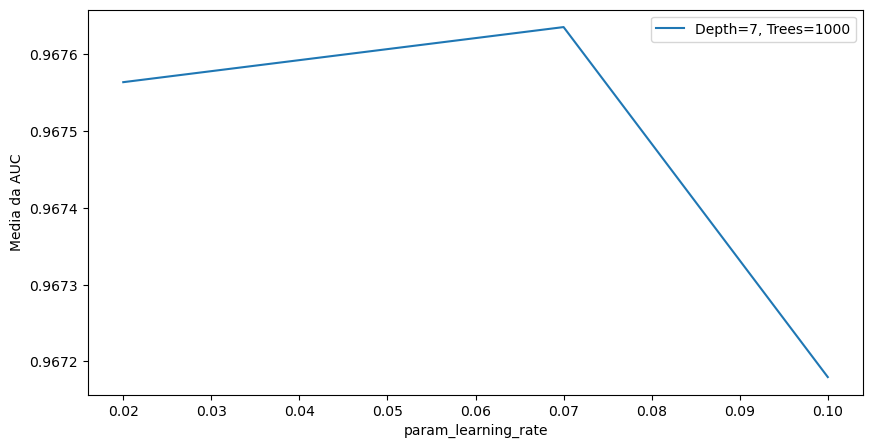

In [35]:

df_cv_results.sort_values(by='param_learning_rate', inplace=True)
plt1 = df_cv_results.loc[(df_cv_results['param_n_estimators']==1000) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
plt1.plot(x='param_learning_rate', y='mean_test_score', label='Depth=7, Trees=1000', ax=ax)
plt.ylabel('Media da AUC')


In [36]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=7,
                                          n_estimators=1000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

train_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=train_set,
                  verbose=True)

[0]	validation_0-auc:0.88653	validation_1-auc:0.83833
[1]	validation_0-auc:0.92459	validation_1-auc:0.88138
[2]	validation_0-auc:0.91950	validation_1-auc:0.86329
[3]	validation_0-auc:0.94845	validation_1-auc:0.89694
[4]	validation_0-auc:0.94696	validation_1-auc:0.89546
[5]	validation_0-auc:0.95378	validation_1-auc:0.90765
[6]	validation_0-auc:0.95450	validation_1-auc:0.91330
[7]	validation_0-auc:0.96007	validation_1-auc:0.92338
[8]	validation_0-auc:0.96368	validation_1-auc:0.92895
[9]	validation_0-auc:0.96535	validation_1-auc:0.92775
[10]	validation_0-auc:0.96772	validation_1-auc:0.92996
[11]	validation_0-auc:0.96853	validation_1-auc:0.93059
[12]	validation_0-auc:0.96736	validation_1-auc:0.92912
[13]	validation_0-auc:0.96738	validation_1-auc:0.92856
[14]	validation_0-auc:0.96839	validation_1-auc:0.93289
[15]	validation_0-auc:0.97183	validation_1-auc:0.93932
[16]	validation_0-auc:0.97085	validation_1-auc:0.93716
[17]	validation_0-auc:0.97168	validation_1-auc:0.94068
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Treino: {:.4f}\nAUC Validação: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Treino: 0.9854
AUC Validação: 0.9571


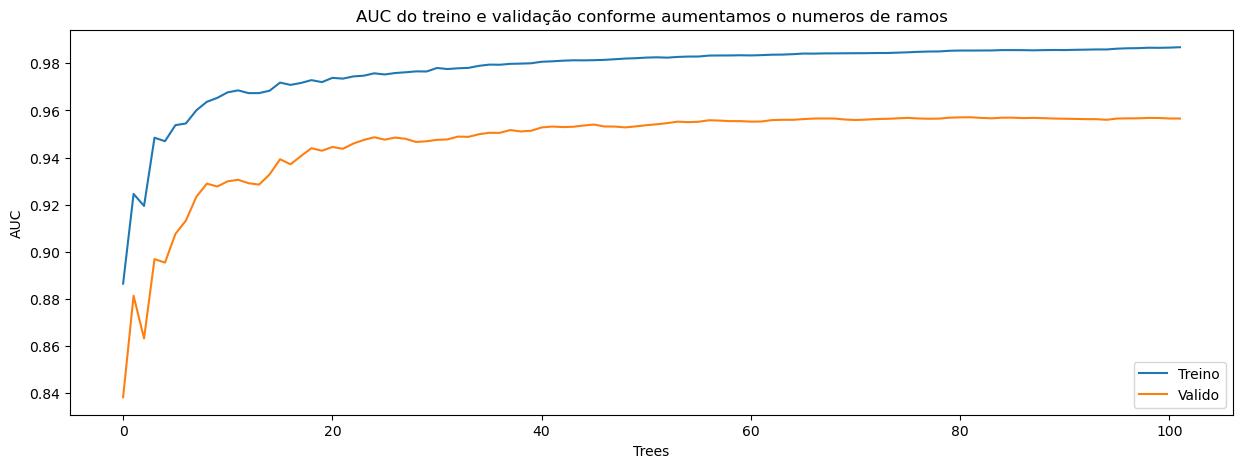

In [38]:
fit_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = fit_results['validation_0']['auc']
valid_auc_tree = fit_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Treino')
plt.plot(valid_auc_tree, label='Valido')

plt.title("AUC do treino e validação conforme aumentamos o numeros de ramos")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [39]:
df_var_imp = pd.DataFrame({"Variavel": var_colums,
                           "Importancia": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importancia', ascending=False)
df_var_imp[:10]

,Variavel,Importancia
36,inhibitors,0.178140
37,opp_inhibitors,0.159596
2,deaths,0.094871
3,assists,0.088588
1,kills,0.040910
50,totalgold,0.024705
79,golddiffat15,0.017304
84,deathsat15,0.015967
0,gamelength,0.011290
52,total cs,0.011155
